<a href="https://colab.research.google.com/github/vjuge/oc-iml/blob/vjuge%2Fissue13/modules/P7/module_P7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# NOTE : to be executed in Collab environment, since statsmodel needs to be updated

!pip3 uninstall -y statsmodels
!pip3 install numpy scipy patsy pandas
!pip3 install statsmodels

Found existing installation: statsmodels 0.12.2
Uninstalling statsmodels-0.12.2:
  Successfully uninstalled statsmodels-0.12.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 8.4 MB/s 


In [4]:
!pip install yfinance
!pip install scalecast
!pip install pmdarima
!pip install attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scalecast.Forecaster import Forecaster
from scalecast.auxmodels import auto_arima
from sklearn.model_selection import train_test_split
import tensorflow as tf
from datetime import datetime
import seaborn as sns
import warnings
import numpy as np
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import load_model, Model

from attention import Attention

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(30,10)})

import sys
import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
df_btc_usd = yf.download("BTC-USD")
df_btc_usd.shape
df_btc_usd.dtypes
df_btc_usd.columns
df_btc_usd.head()
df_btc_usd.index

df_btc_usd = df_btc_usd.asfreq('d')
pd.infer_freq(df_btc_usd.asfreq('d').index)


[*********************100%***********************]  1 of 1 completed


(2926, 6)

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-09-11', '2022-09-12', '2022-09-13', '2022-09-14',
               '2022-09-15', '2022-09-16', '2022-09-17', '2022-09-18',
               '2022-09-19', '2022-09-20'],
              dtype='datetime64[ns]', name='Date', length=2926, freq=None)

'D'

In [7]:
# keep only CLose column
df_btc_usd = df_btc_usd['Close']
df_btc_usd = df_btc_usd[df_btc_usd.index > '2021-01-01']
df_btc_usd.shape


(627,)

### Naive Approach

In [ ]:
f = Forecaster(y=df_btc_usd, current_dates=df_btc_usd.index)
f

Forecaster(
    DateStartActuals=2021-01-02T00:00:00.000000000
    DateEndActuals=2022-09-15T00:00:00.000000000
    Freq=D
    N_actuals=622
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

In [ ]:
f.generate_future_dates(12)
f.set_test_length(.2)
f.set_estimator('arima')
f.manual_forecast(call_me='arima1')

<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'ARIMA Test-Set Performance')

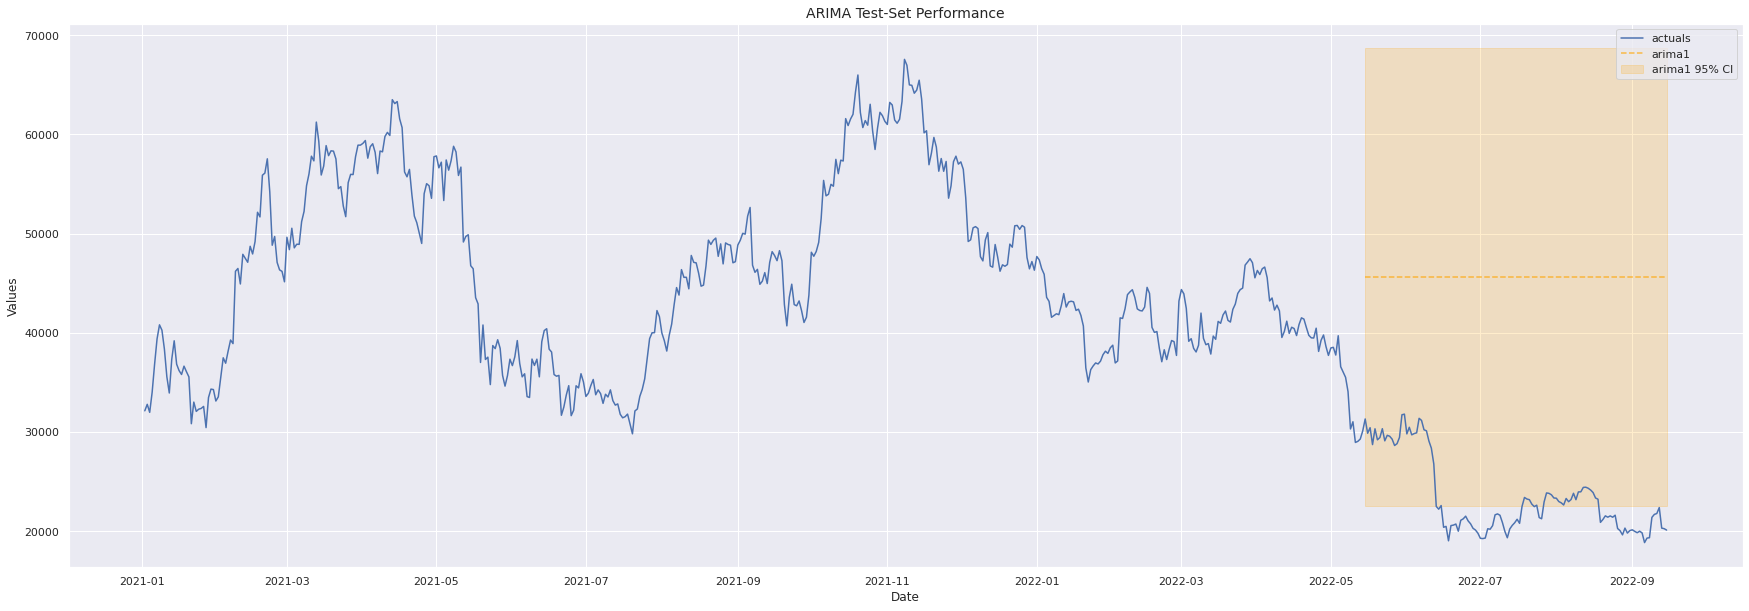

In [ ]:
f.plot_test_set(ci=True)
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'ARIMA Forecast Performance')

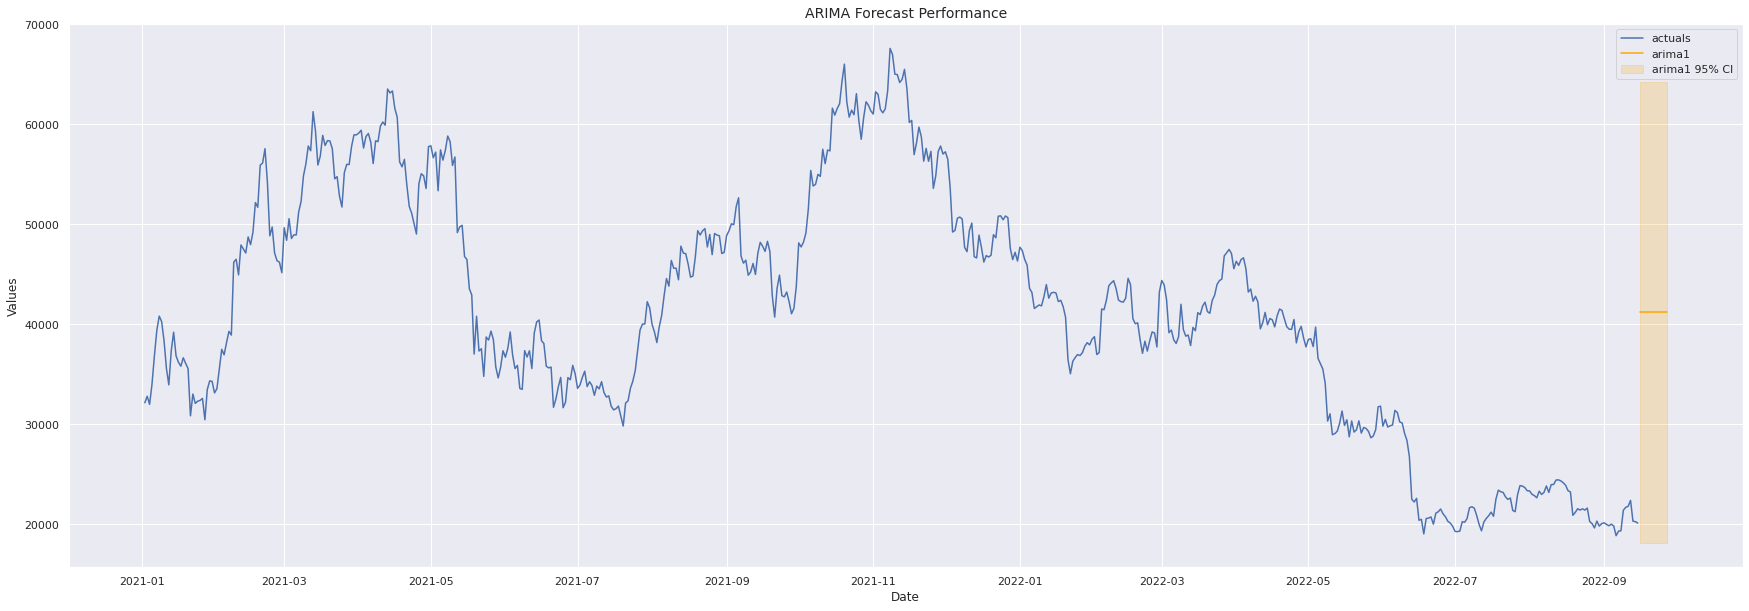

In [ ]:
f.plot(ci=True)
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

### Human Interpretation - Iterative Approach

<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'ARIMA Test-Set Performance')

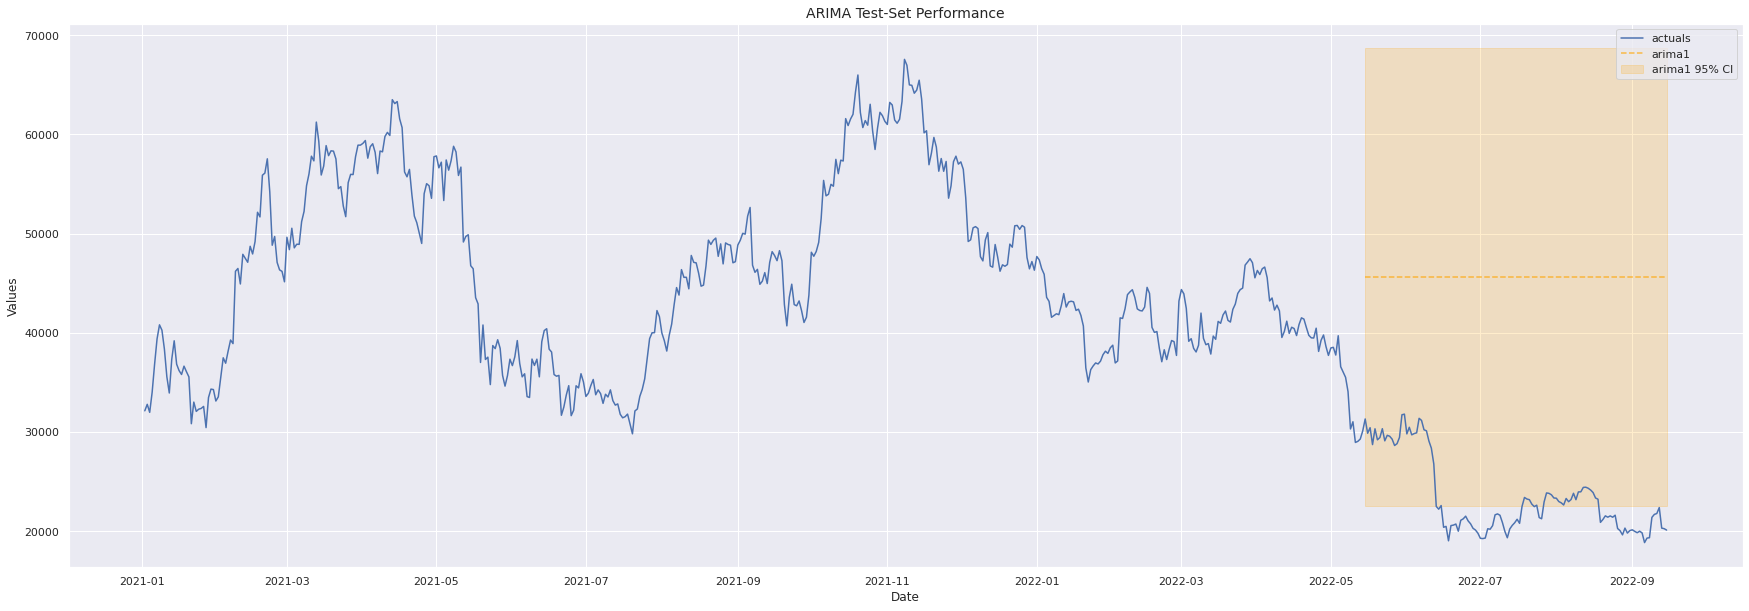

In [ ]:
f.plot_test_set(ci=True)
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Values'>

Text(0.5, 1.0, 'ARIMA Forecast Performance')

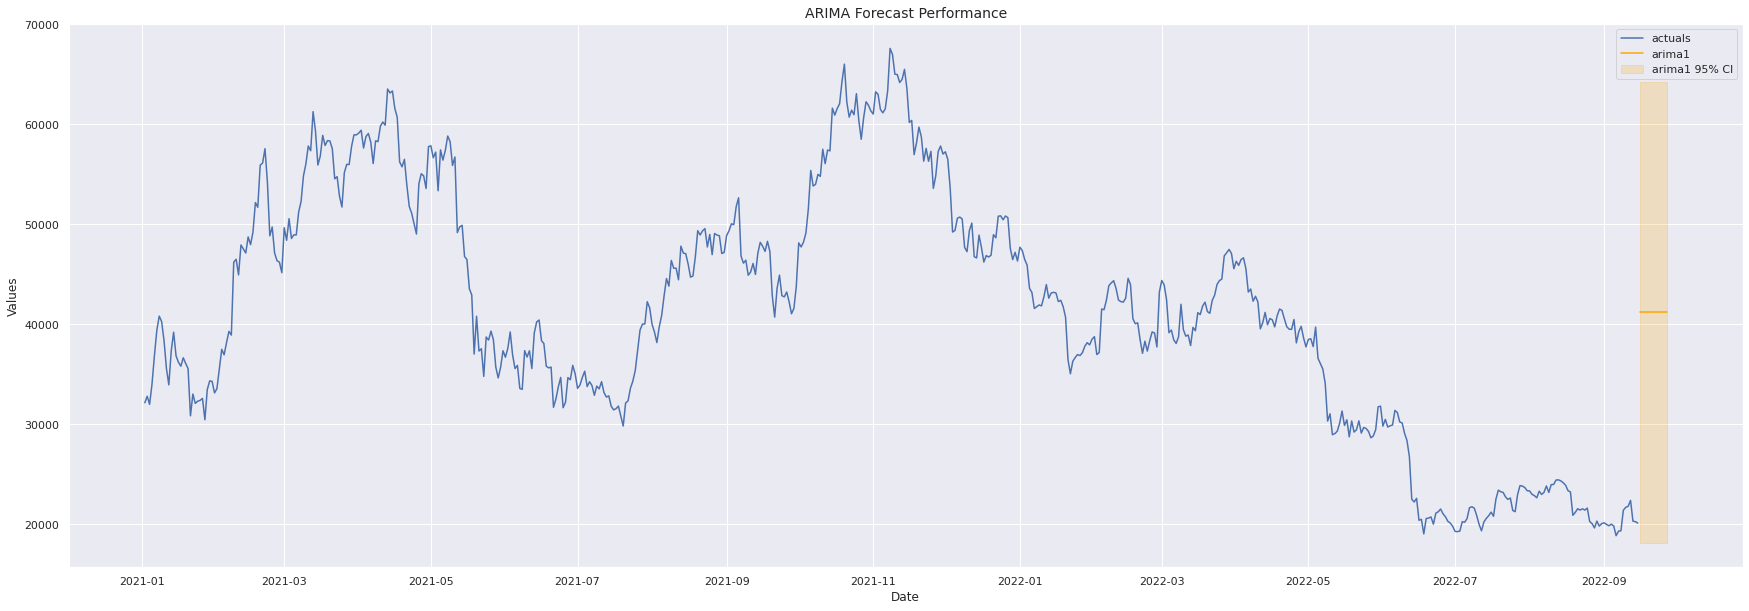

In [ ]:
f.plot(ci=True)
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

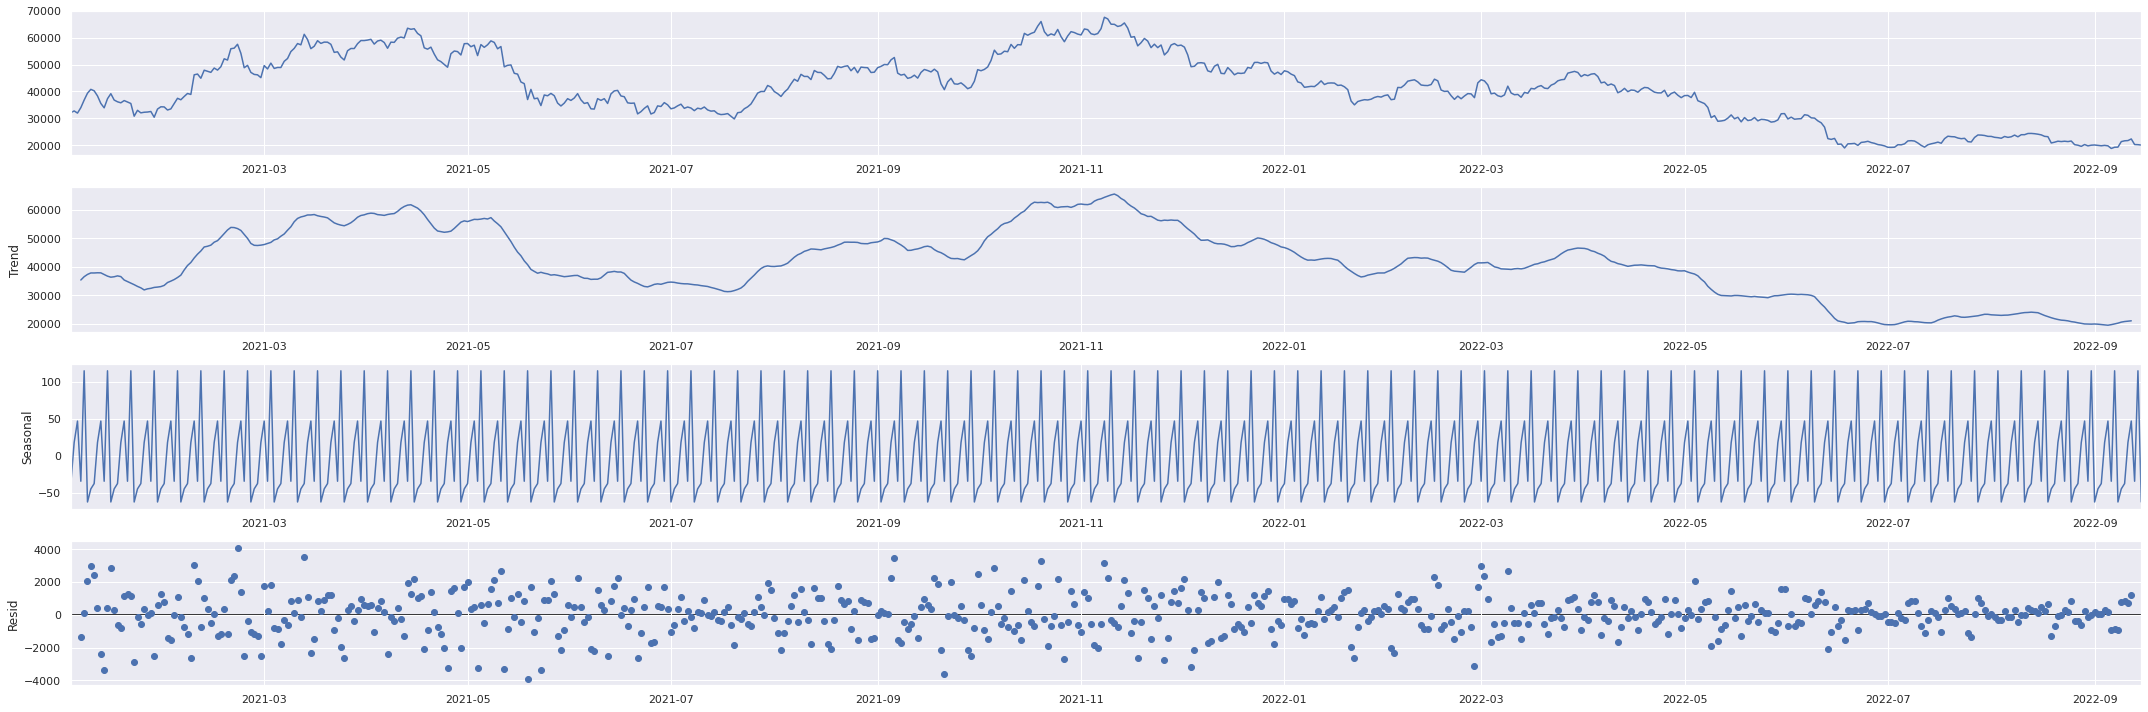

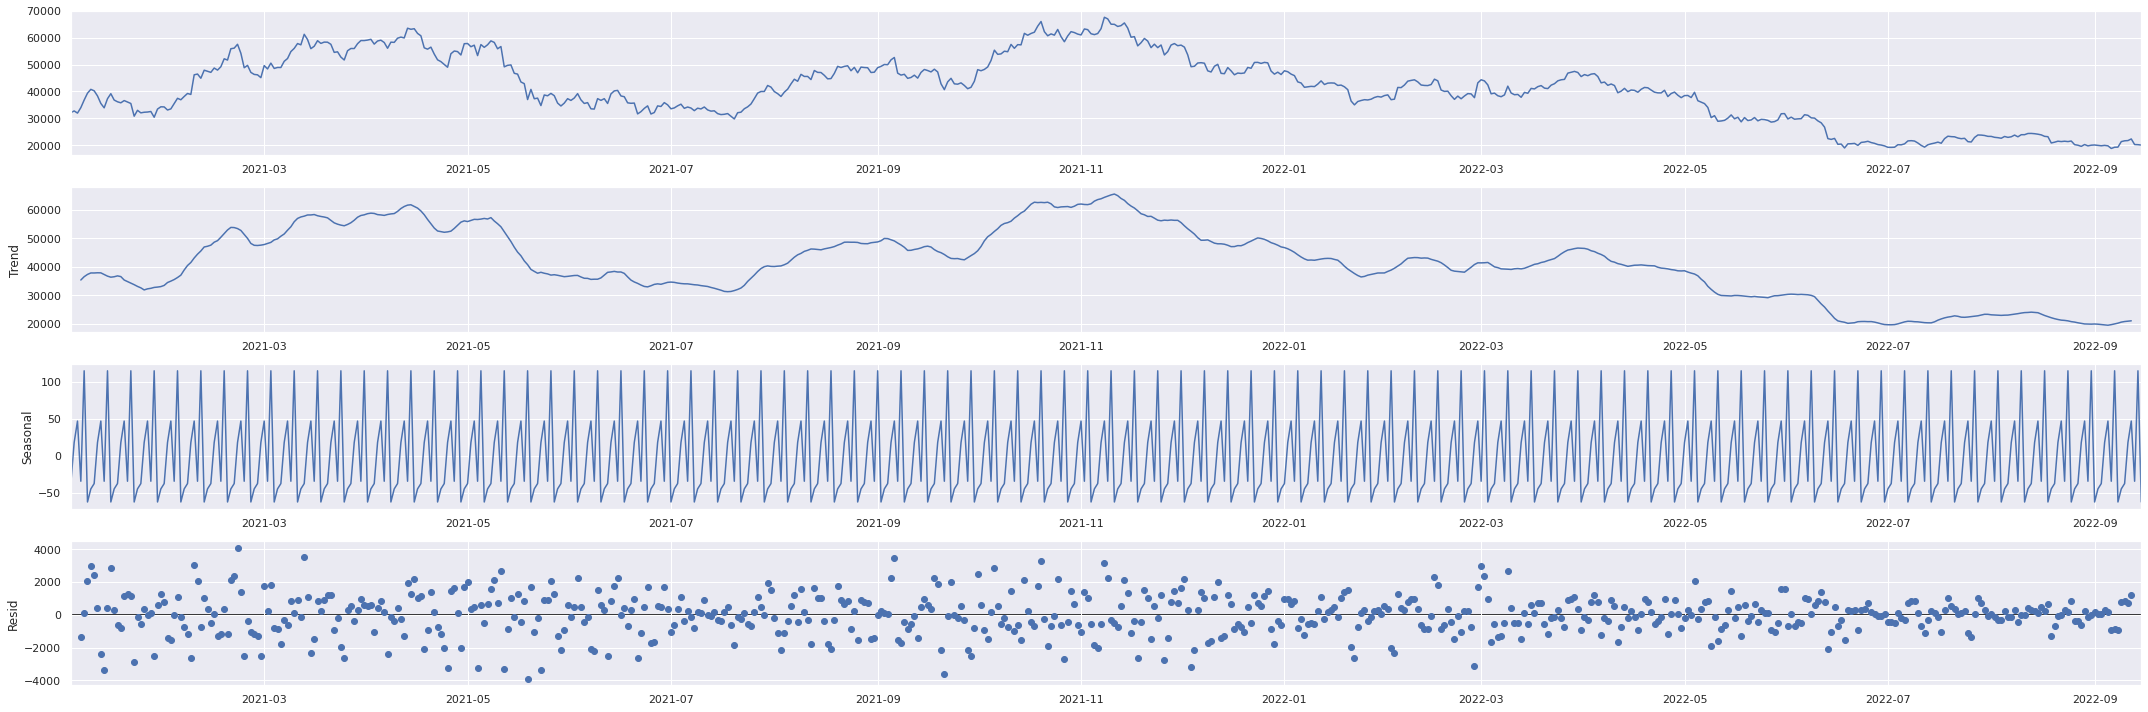

In [ ]:
f.seasonal_decompose().plot()
plt.show()

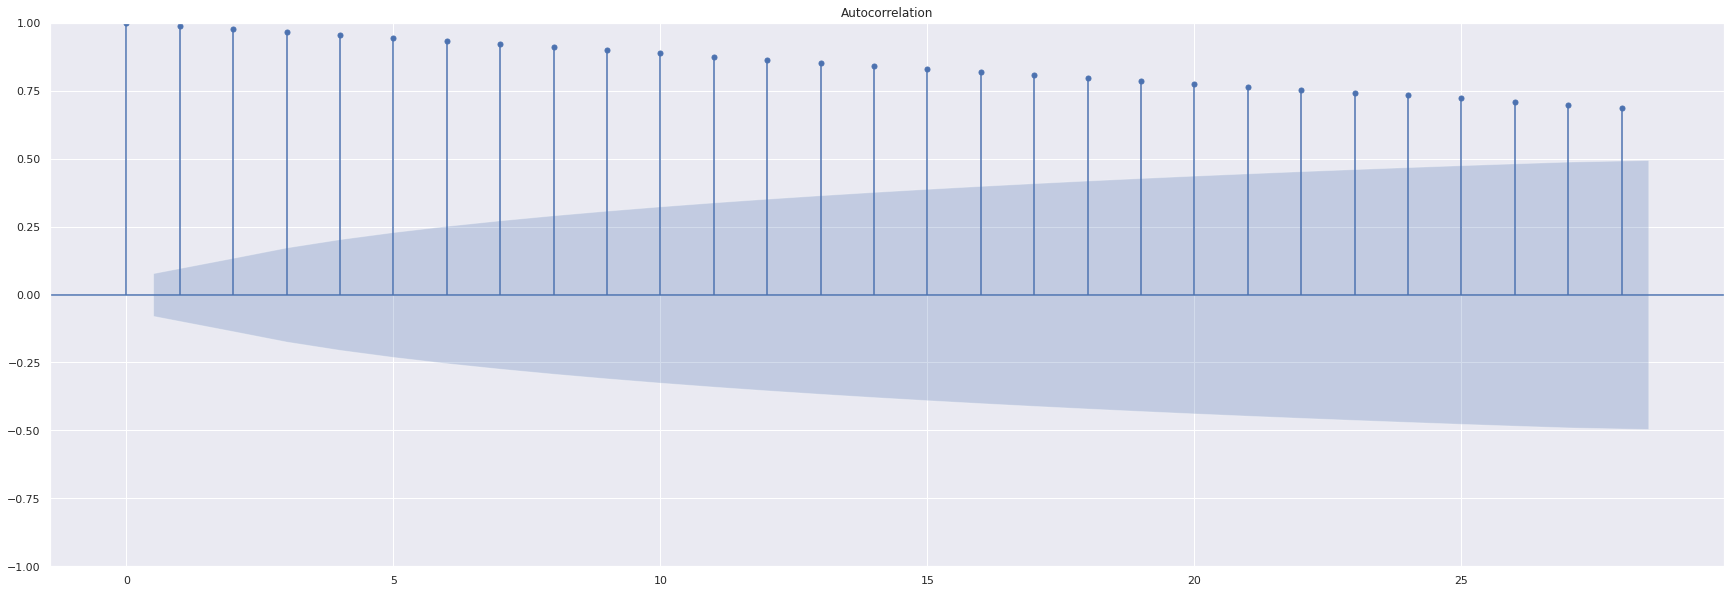

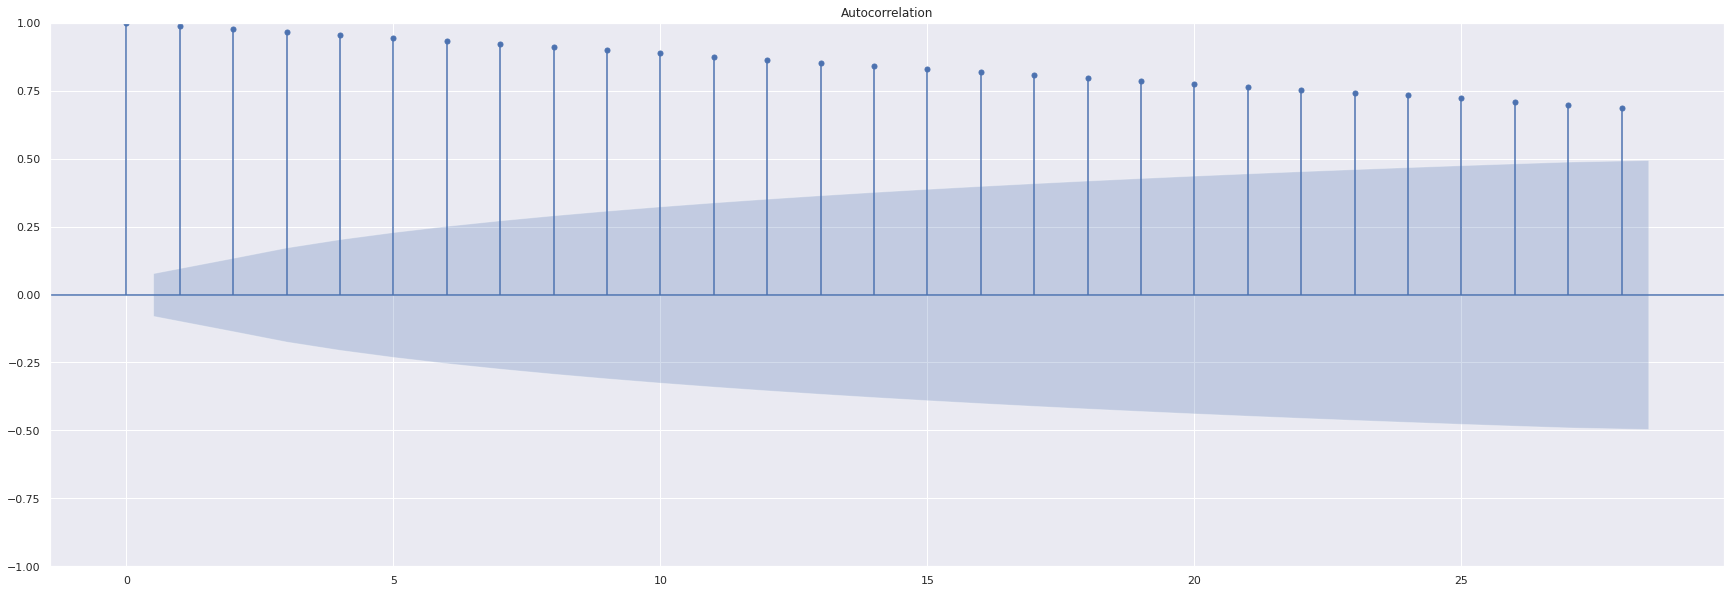

In [ ]:
f.plot_acf()
plt.show()

In [ ]:
f.manual_forecast(order=(1,1,1),seasonal_order=(2,1,1,12),call_me='arima2')


LinAlgError: LU decomposition error.

In [ ]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

-1.3162565829160322
0.6217024799292428


In [ ]:
f.manual_forecast(order=(1,1,1),seasonal_order=(2,1,1,12),call_me='arima2')


LinAlgError: LU decomposition error.

Text(0.5, 1.0, 'ARIMA Test-Set Performance')

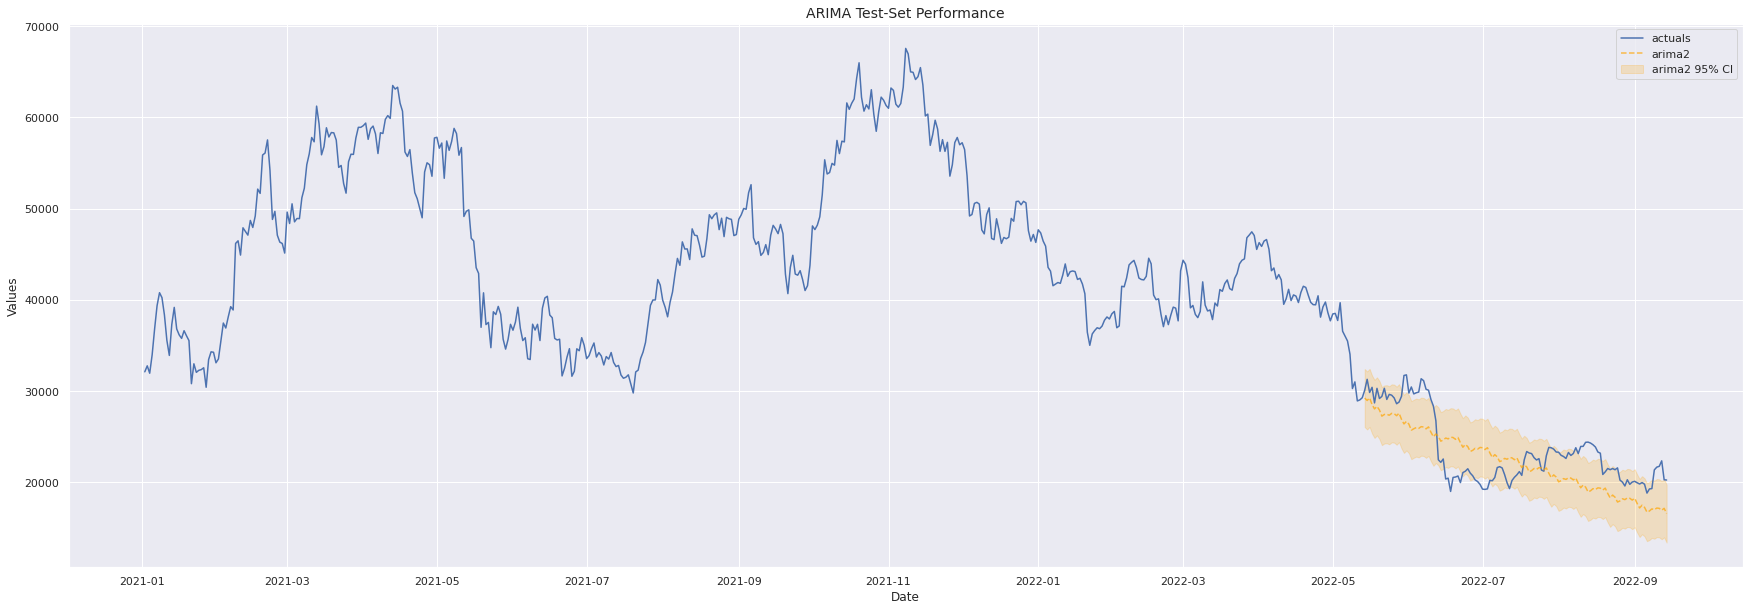

In [ ]:
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

Text(0.5, 1.0, 'ARIMA Forecast Performance')

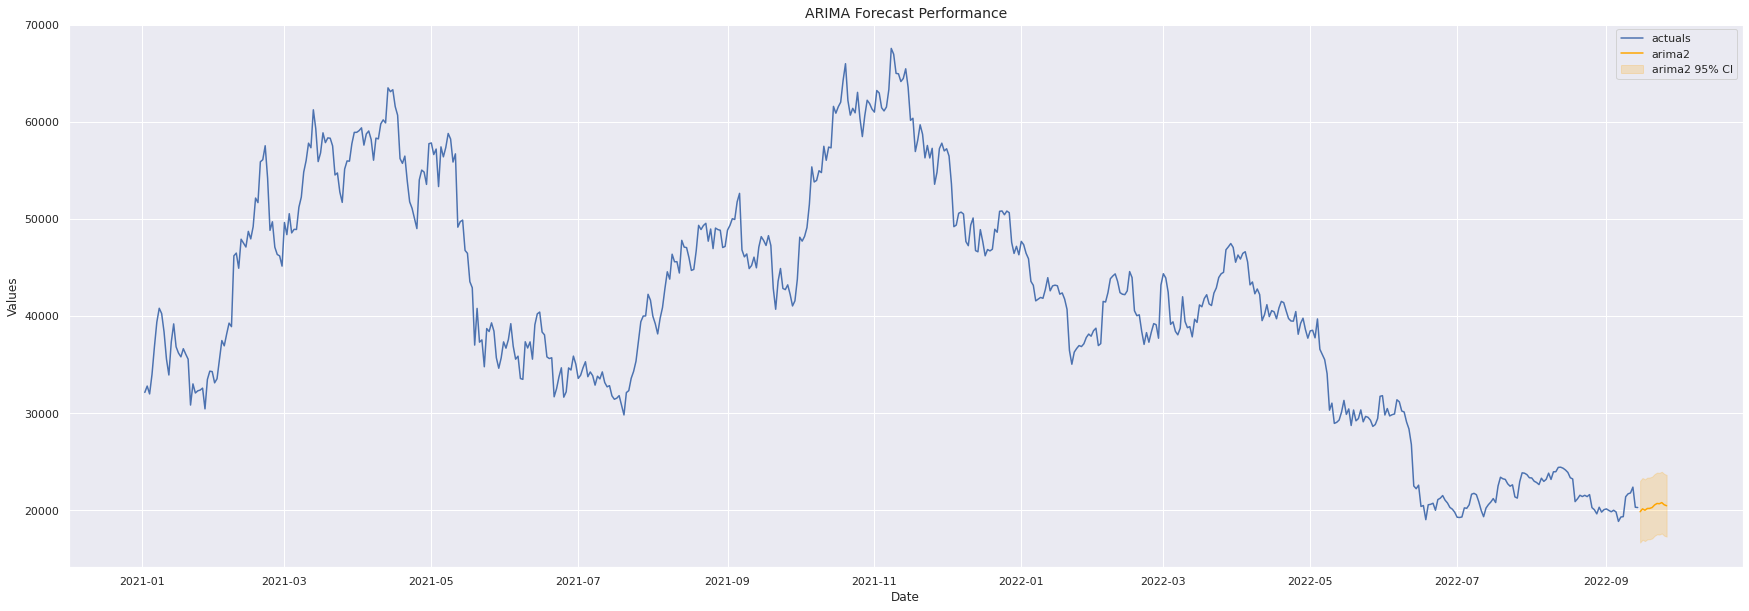

In [ ]:
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [ ]:
f.regr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  621
Model:             ARIMA(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -5435.656
Date:                          Wed, 14 Sep 2022   AIC                          10883.312
Time:                                  14:58:32   BIC                          10909.773
Sample:                                       0   HQIC                         10893.607
                                          - 621                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.118      8.445      0.000       0.768       1.232
ma.L1         -0.9999      0.344     -2.905      0.004      -1.675      -0.325
ar.S.L12       0.1148      0.037      3.142      0.002       0.043       0.186
ar.S.L24       0.0706      0.026      2.692      0.007       0.019       0.122
ma.S.L12      -0.9978      0.425     -2.347      0.019      -1.831      -0.165
sigma2      4.052e+06   1.15e-07   3.52e+13      0.000    4.05e+06    4.05e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):               280.28
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.8e+29. Standard errors may be unstable.
"""

## Auto ARIMA Approach

In [ ]:
auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=2,
    max_D=2,
    max_Q=2,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=8840.181, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8835.313, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8837.784, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8837.926, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8833.319, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=8836.057, Time=0.16 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=8836.203, Time=0.14 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8834.549, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8837.045, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=8837.043, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=8839.037, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 2.610 seconds


Text(0.5, 1.0, 'ARIMA Test-Set Performance')

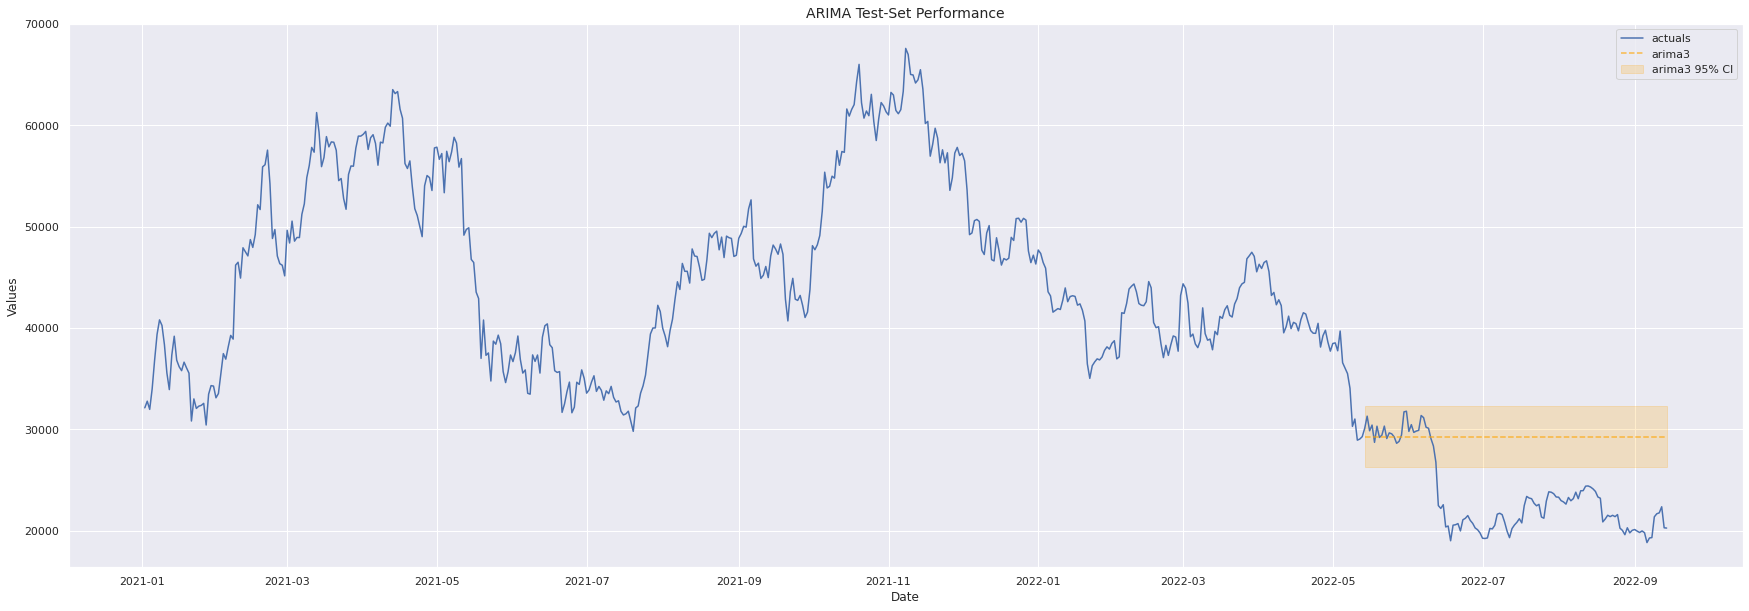

In [ ]:
f.plot_test_set(ci=True,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

Text(0.5, 1.0, 'ARIMA Forecast Performance')

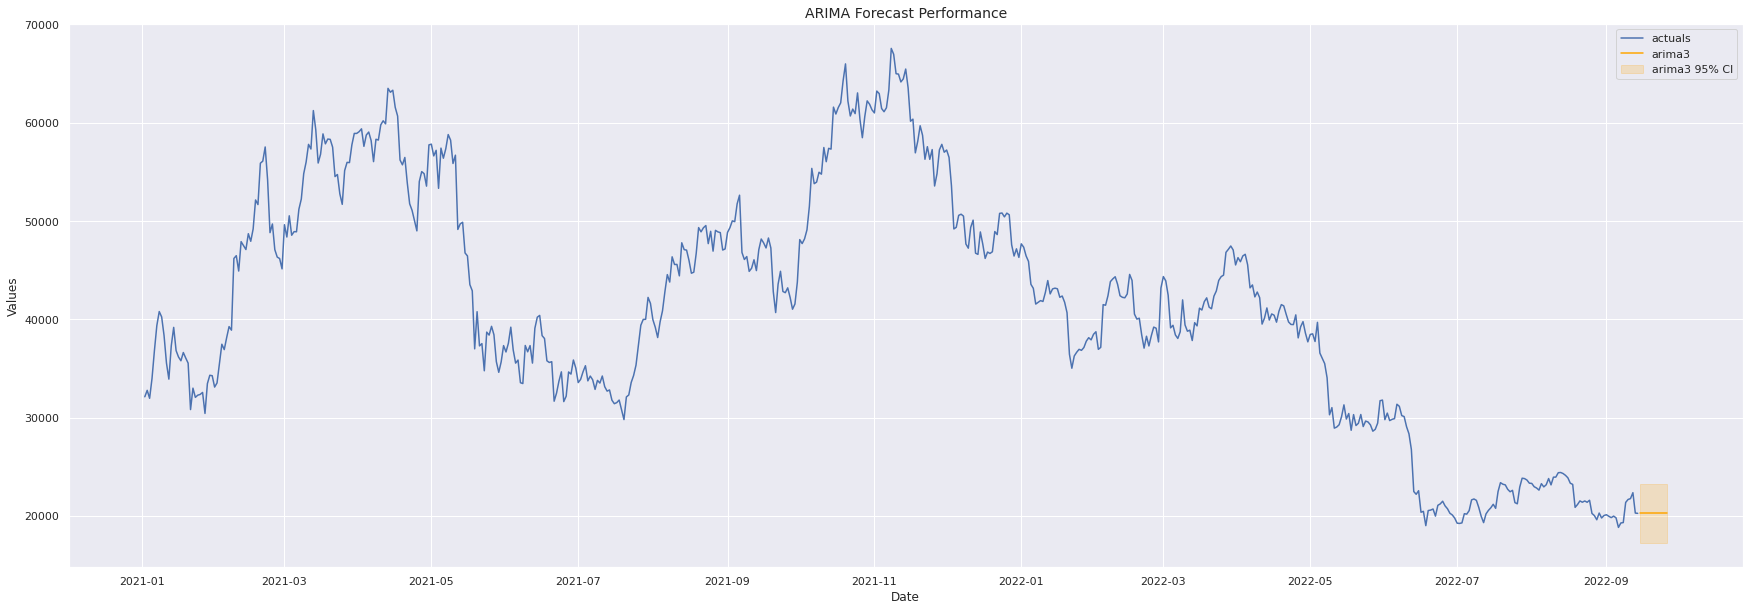

In [ ]:
f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [ ]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  621
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -5469.381
Date:                Wed, 14 Sep 2022   AIC                          10940.762
Time:                        14:58:36   BIC                          10945.192
Sample:                             0   HQIC                         10942.484
                                - 621                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.686e+06   1.05e+05     25.659      0.000    2.48e+06    2.89e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):               129.40
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Grid Search Approach - TODO

## LSTM

In [ ]:
critical_pval = 0.05
print('-'*100)
print('Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

----------------------------------------------------------------------------------------------------
Augmented Dickey-Fuller results:
the test-stat value is: -1.32
the p-value is 0.6178
the series is not stationary
----------------------------------------------------------------------------------------------------


### Prepare Forecast for LSTM

In [ ]:
f.set_test_length(12)
f.generate_future_dates(12)

#### Attempt 1

In [ ]:
f.set_estimator('lstm')
f.manual_forecast(call_me='lstm_default')

19/19 [==============================] - 1s 3ms/step - loss: 0.4439


Text(0.5, 1.0, 'Default Test-set Performance')

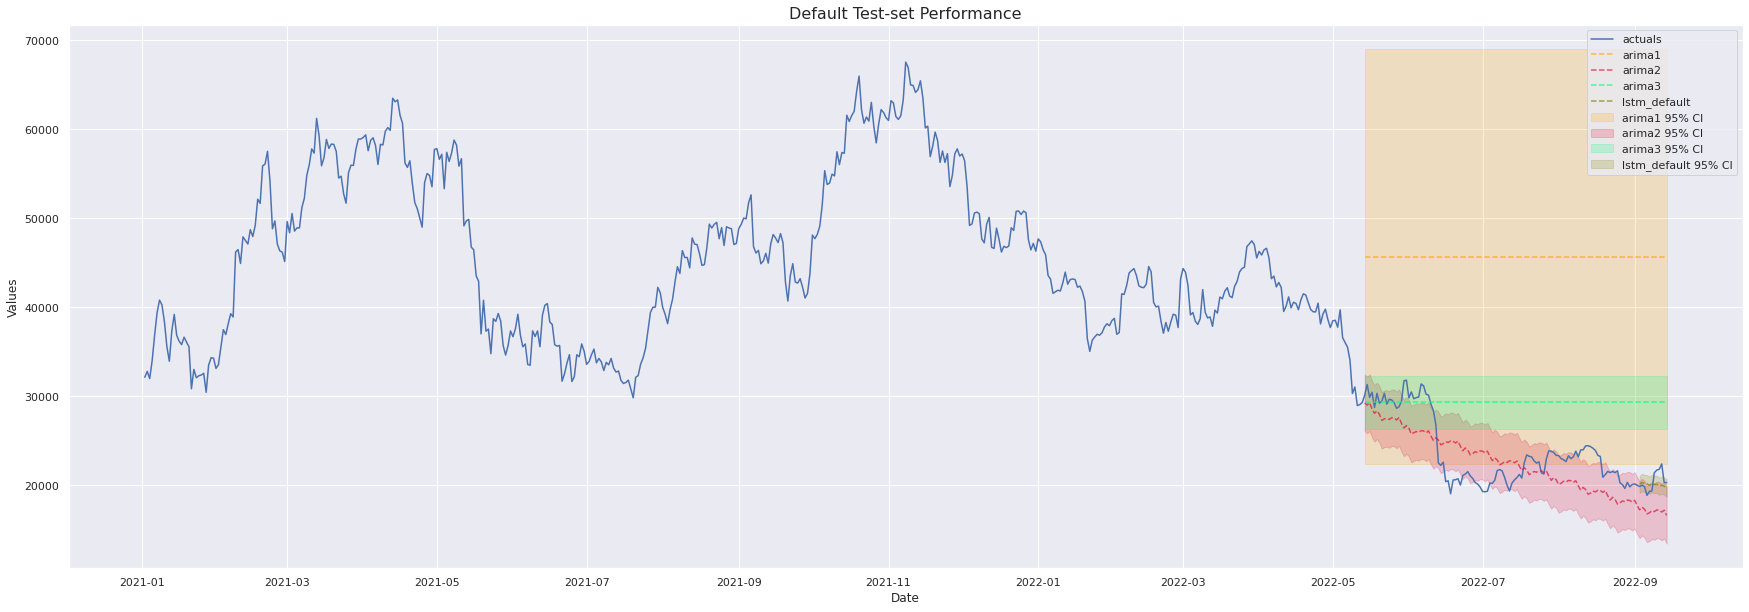

In [ ]:
f.plot_test_set(ci=True)
plt.title('Default Test-set Performance',size=16)
plt.show()

#### Attempt 2

In [ ]:
f.manual_forecast(call_me='lstm_24lags',lags=24)

19/19 [==============================] - 2s 4ms/step - loss: 0.4392


Text(0.5, 1.0, 'All Models Test-set Performance')

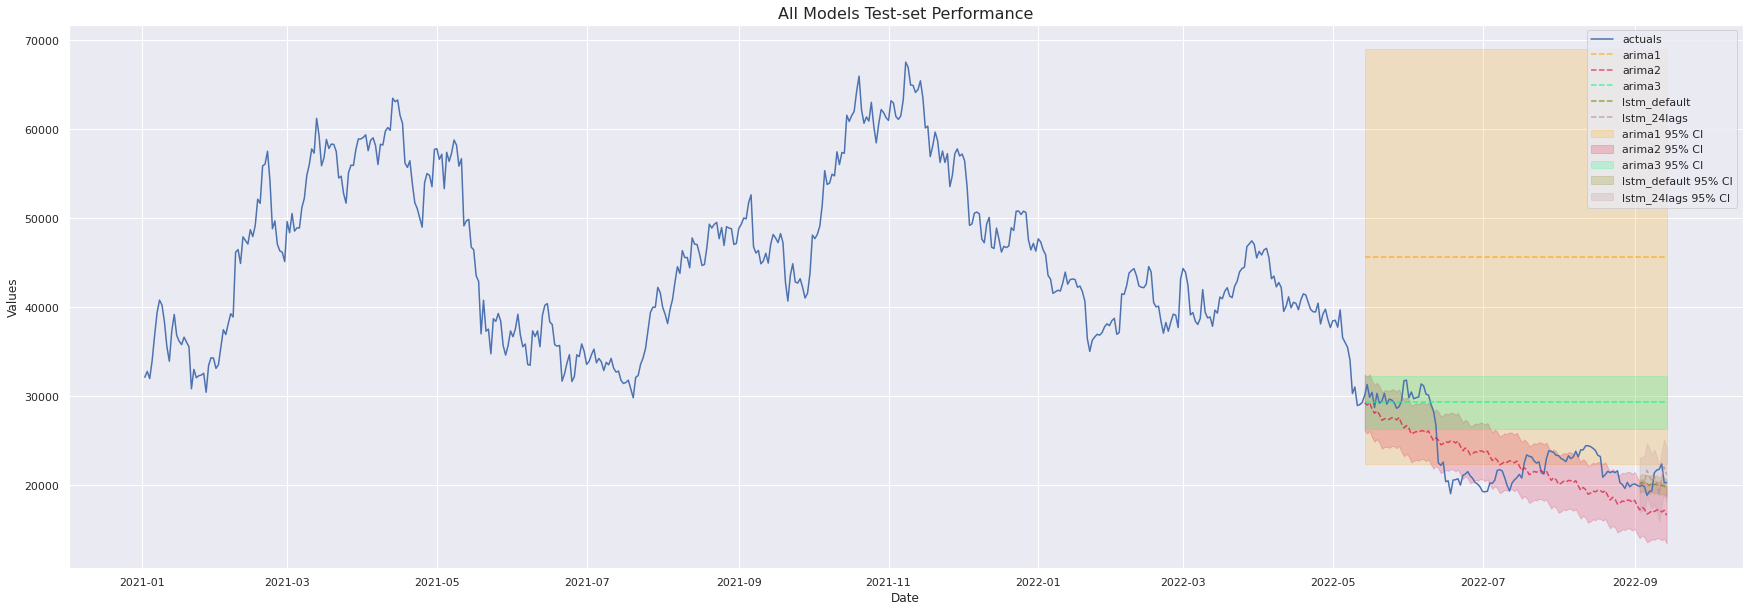

In [ ]:
f.plot_test_set(ci=True)
plt.title('All Models Test-set Performance',size=16)
plt.show()

#### Attempt 3

In [ ]:
f.manual_forecast(call_me='lstm_24lags_5epochs',lags=24,epochs=5,validation_split=.2,shuffle=True)


Epoch 1/5
15/15 [==============================] - 2s 36ms/step - loss: 0.4199 - val_loss: 0.6487
Epoch 2/5
15/15 [==============================] - 0s 6ms/step - loss: 0.3858 - val_loss: 0.6057
Epoch 3/5
15/15 [==============================] - 0s 6ms/step - loss: 0.3526 - val_loss: 0.5563
Epoch 4/5
15/15 [==============================] - 0s 6ms/step - loss: 0.3142 - val_loss: 0.4908
Epoch 5/5
15/15 [==============================] - 0s 6ms/step - loss: 0.2722 - val_loss: 0.4171
Epoch 1/5
15/15 [==============================] - 2s 35ms/step - loss: 0.3861 - val_loss: 0.5934
Epoch 2/5
15/15 [==============================] - 0s 6ms/step - loss: 0.3334 - val_loss: 0.5175
Epoch 3/5
15/15 [==============================] - 0s 6ms/step - loss: 0.2769 - val_loss: 0.4218
Epoch 4/5
15/15 [==============================] - 0s 6ms/step - loss: 0.2244 - val_loss: 0.3260
Epoch 5/5
15/15 [==============================] - 0s 6ms/step - loss: 0.1836 - val_loss: 0.2732


Text(0.5, 1.0, 'All Models Test-set Performance')

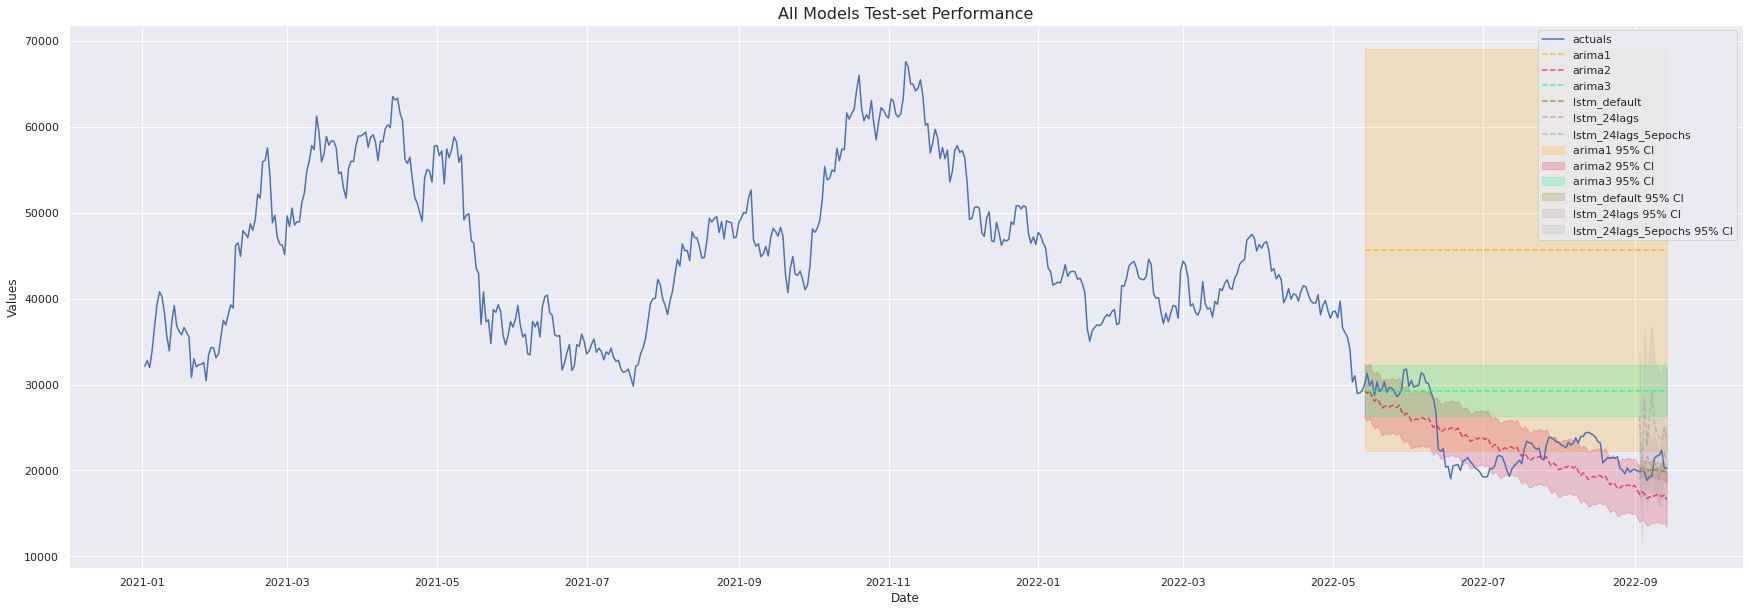

In [ ]:
f.plot_test_set(ci=True)
plt.title('All Models Test-set Performance',size=16)
plt.show()

#### Attempt 4

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))

Epoch 1/25
15/15 [==============================] - 6s 85ms/step - loss: 0.3924 - val_loss: 0.5538
Epoch 2/25
15/15 [==============================] - 0s 9ms/step - loss: 0.3003 - val_loss: 0.4037
Epoch 3/25
15/15 [==============================] - 0s 9ms/step - loss: 0.1947 - val_loss: 0.2431
Epoch 4/25
15/15 [==============================] - 0s 9ms/step - loss: 0.1204 - val_loss: 0.1737
Epoch 5/25
15/15 [==============================] - 0s 9ms/step - loss: 0.1015 - val_loss: 0.1585
Epoch 6/25
15/15 [==============================] - 0s 9ms/step - loss: 0.0944 - val_loss: 0.1760
Epoch 7/25
15/15 [==============================] - 0s 10ms/step - loss: 0.0899 - val_loss: 0.1621
Epoch 8/25
15/15 [==============================] - 0s 10ms/step - loss: 0.0871 - val_loss: 0.1464
Epoch 9/25
15/15 [==============================] - 0s 10ms/step - loss: 0.0844 - val_loss: 0.1582
Epoch 10/25
15/15 [==============================] - 0s 10ms/step - loss: 0.0842 - val_loss: 0.1351
Epoch 11/25
15

Text(0.5, 1.0, 'All Models Test-Set Performance')

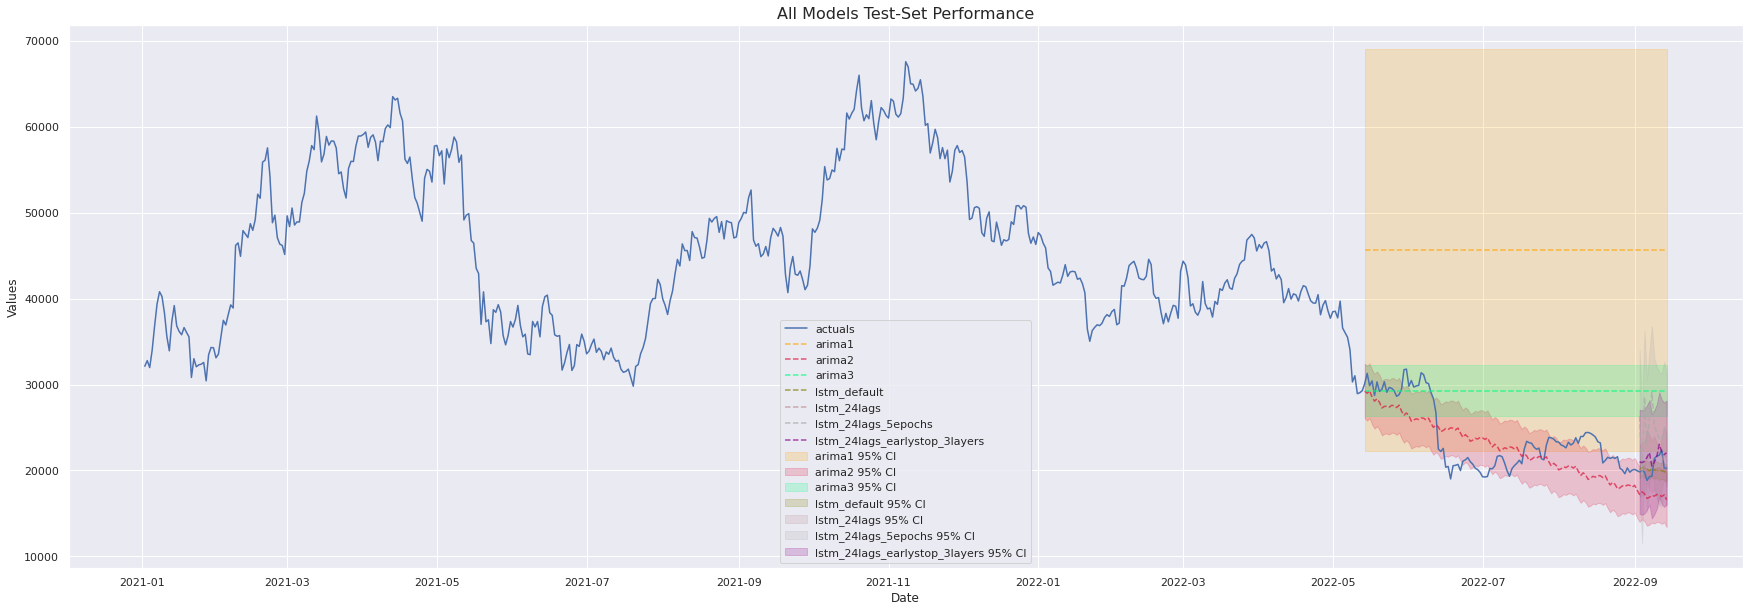

In [ ]:
f.plot_test_set(ci=True)
plt.title('All Models Test-Set Performance',size=16)
plt.show()

#### Attempt 5

Epoch 1/15
14/14 [==============================] - 7s 160ms/step - loss: 0.2422 - val_loss: 0.2220
Epoch 2/15
14/14 [==============================] - 0s 16ms/step - loss: 0.1114 - val_loss: 0.1780
Epoch 3/15
14/14 [==============================] - 0s 13ms/step - loss: 0.0956 - val_loss: 0.1588
Epoch 4/15
14/14 [==============================] - 0s 13ms/step - loss: 0.0895 - val_loss: 0.1650
Epoch 5/15
14/14 [==============================] - 0s 13ms/step - loss: 0.0827 - val_loss: 0.1273
Epoch 6/15
14/14 [==============================] - 0s 13ms/step - loss: 0.0803 - val_loss: 0.1269
Epoch 7/15
14/14 [==============================] - 0s 13ms/step - loss: 0.0781 - val_loss: 0.1408
Epoch 8/15
14/14 [==============================] - 0s 13ms/step - loss: 0.0771 - val_loss: 0.1351
Epoch 9/15
14/14 [==============================] - 0s 14ms/step - loss: 0.0775 - val_loss: 0.1306
Epoch 10/15
14/14 [==============================] - 0s 13ms/step - loss: 0.0798 - val_loss: 0.1286
Epoch 11

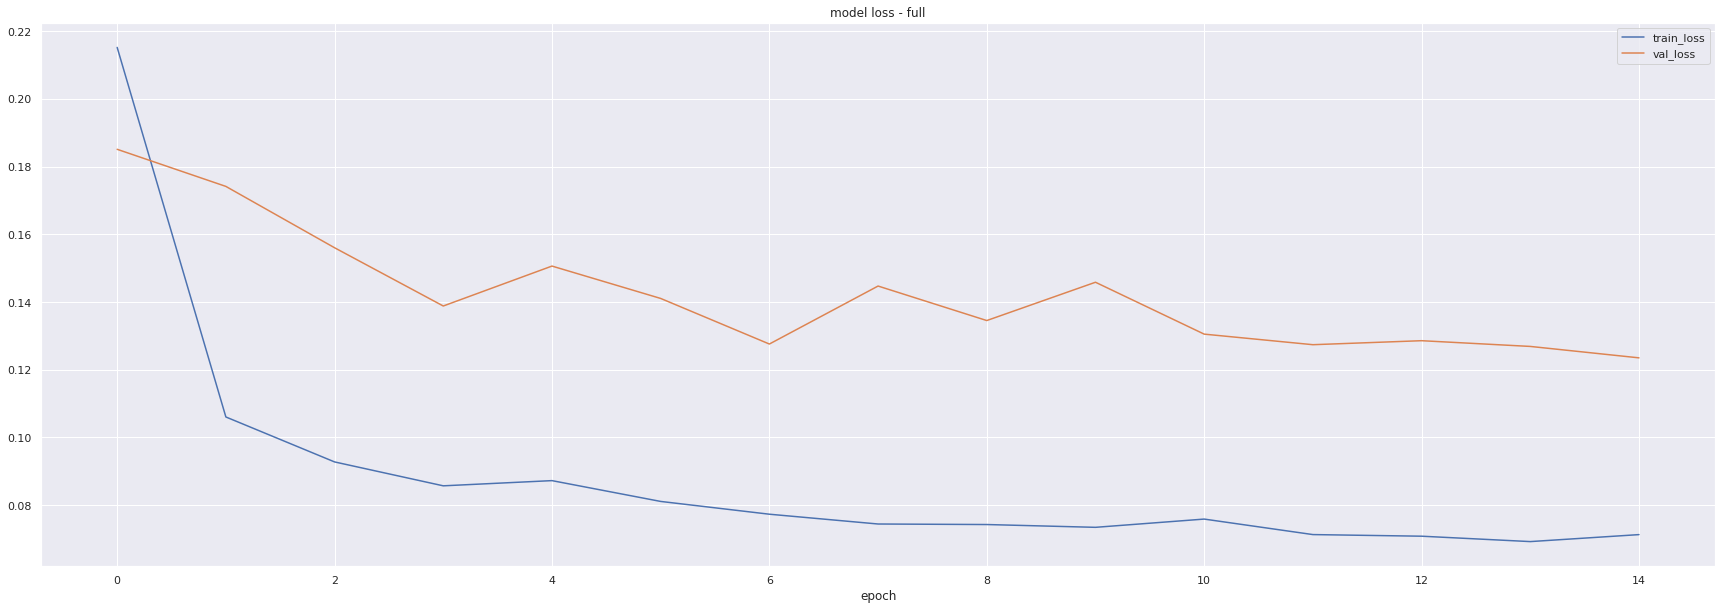

In [ ]:
f.manual_forecast(call_me='lstm_24lags_4layers_15epochs',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)

Text(0.5, 1.0, '24 Lags 4 Layers 15 Epochs Test-Set Performance')

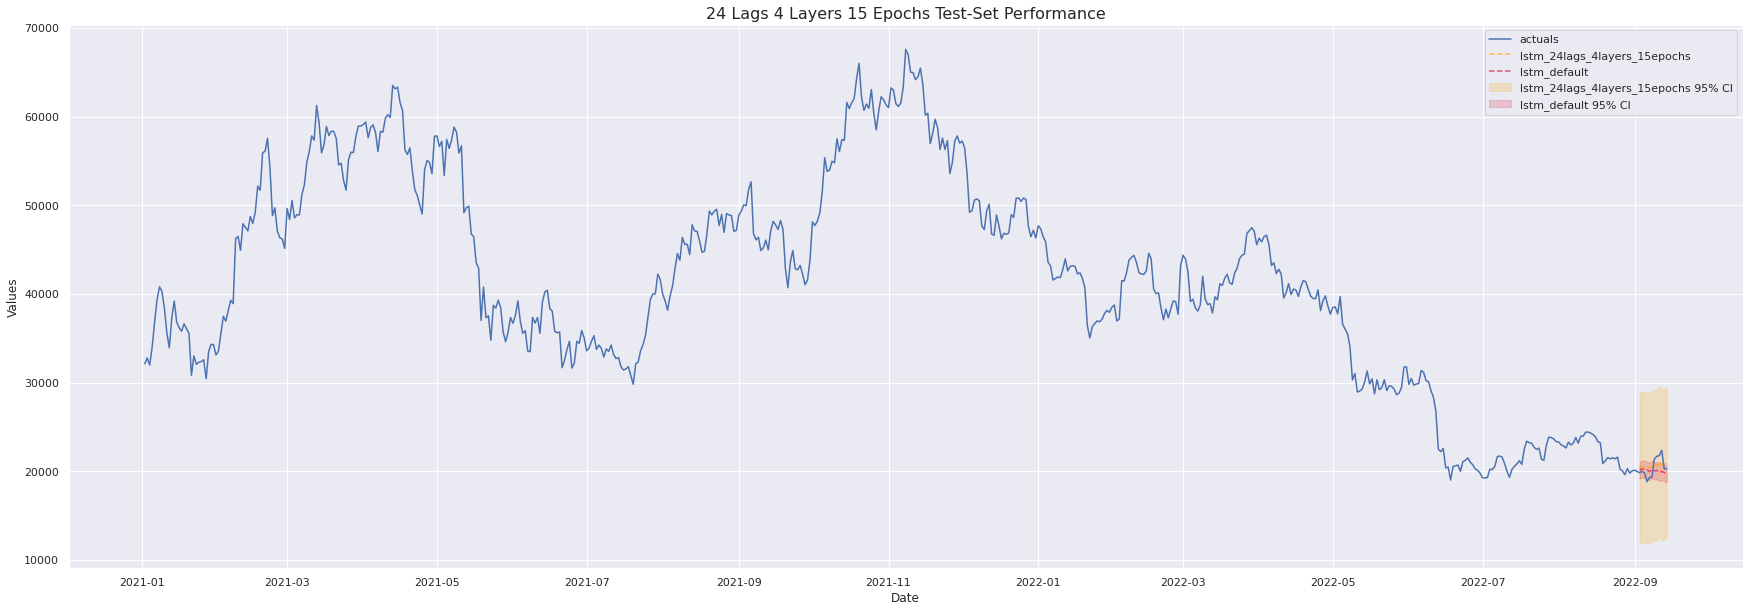

In [ ]:
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)
plt.title('24 Lags 4 Layers 15 Epochs Test-Set Performance',size=16)
plt.show()

#### Attempt 6

Epoch 1/300
28/28 [==============================] - 24s 248ms/step - loss: 0.2358 - val_loss: 0.2767
Epoch 2/300
28/28 [==============================] - 1s 50ms/step - loss: 0.1455 - val_loss: 0.2191
Epoch 3/300
28/28 [==============================] - 1s 49ms/step - loss: 0.1494 - val_loss: 0.2866
Epoch 4/300
28/28 [==============================] - 1s 49ms/step - loss: 0.1395 - val_loss: 0.2441
Epoch 5/300
28/28 [==============================] - 1s 49ms/step - loss: 0.1399 - val_loss: 0.2233
Epoch 6/300
28/28 [==============================] - 1s 50ms/step - loss: 0.1416 - val_loss: 0.2258
Epoch 7/300
28/28 [==============================] - 1s 50ms/step - loss: 0.1377 - val_loss: 0.2432
Epoch 8/300
28/28 [==============================] - 1s 49ms/step - loss: 0.1404 - val_loss: 0.2397
Epoch 9/300
28/28 [==============================] - 1s 50ms/step - loss: 0.1370 - val_loss: 0.2158
Epoch 10/300
28/28 [==============================] - 1s 49ms/step - loss: 0.1338 - val_loss: 0.23

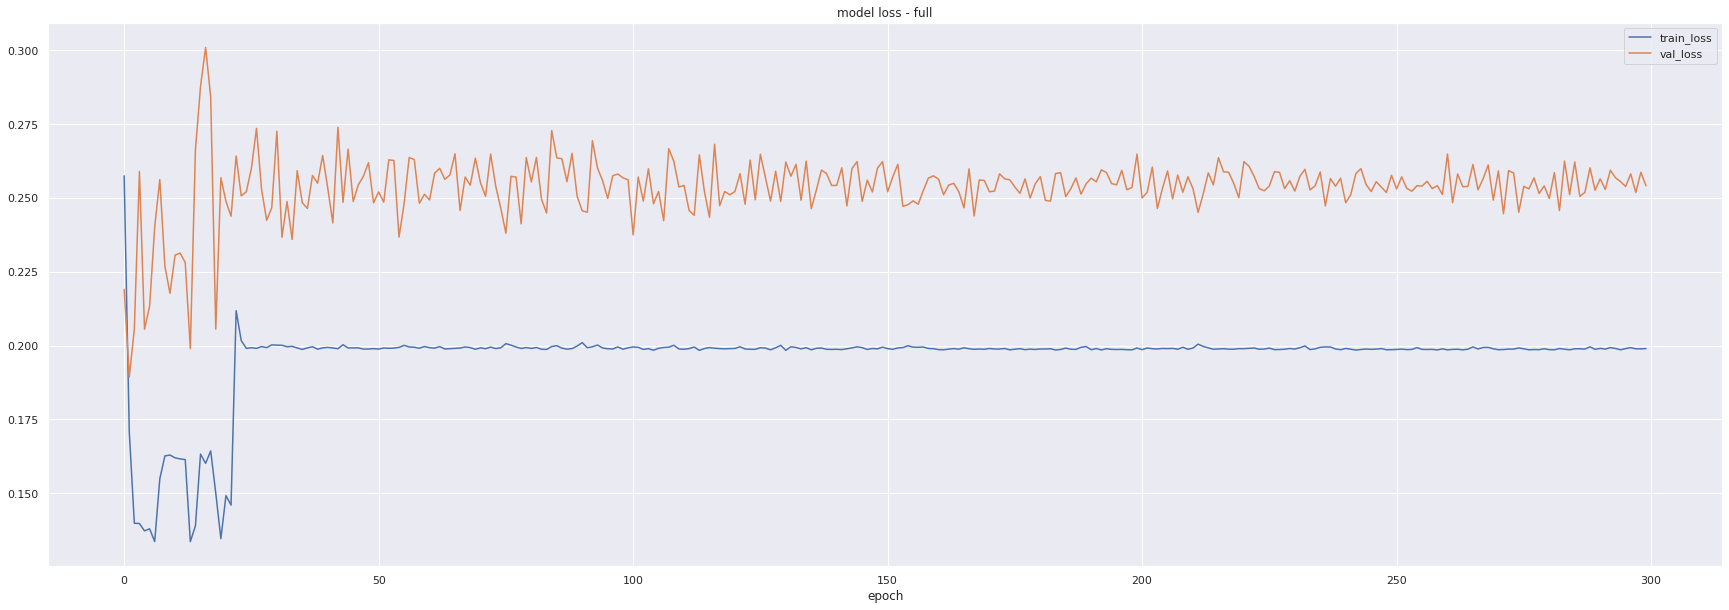

In [ ]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=16,
                  epochs=300,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

Text(0.5, 1.0, 'Top-2 Models Test-set Performance')

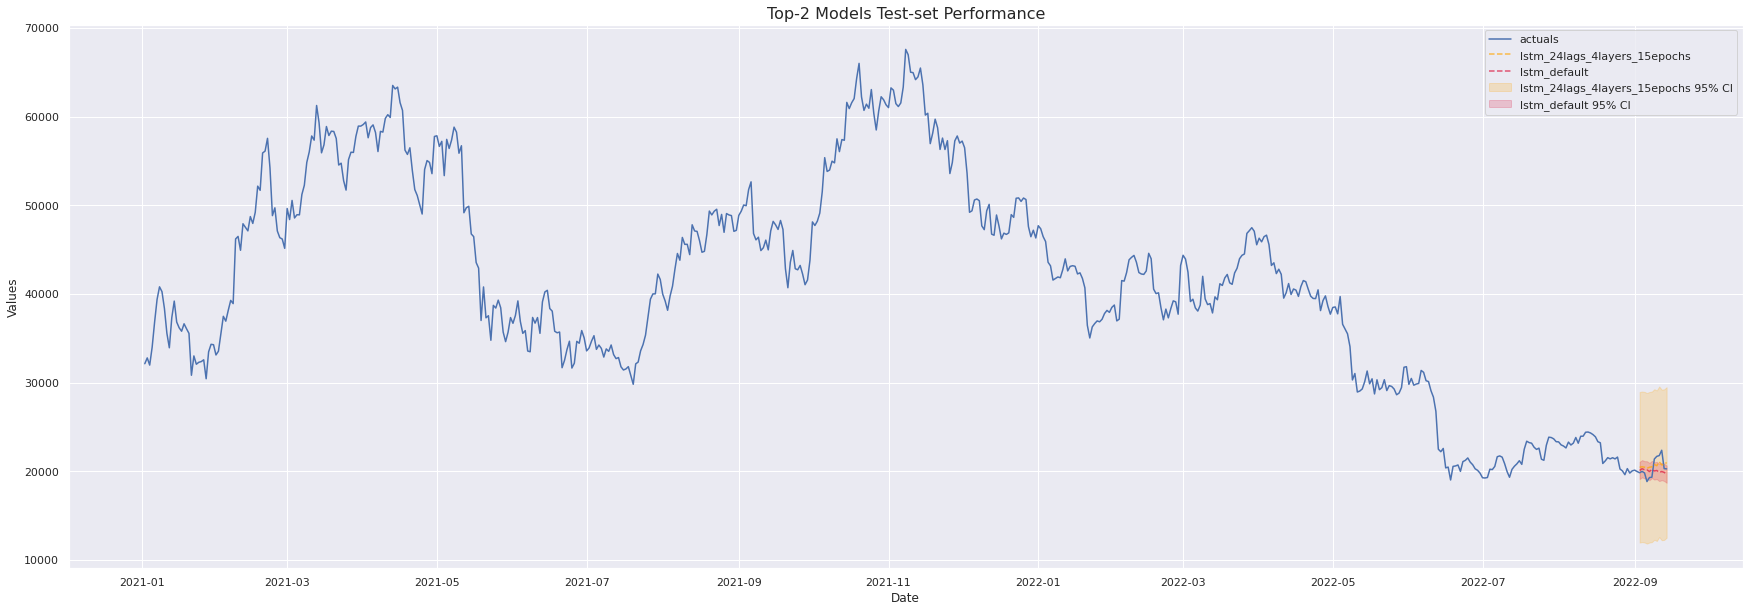

In [ ]:
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)
plt.title('Top-2 Models Test-set Performance',size=16)
plt.show()

## Attention NN

In [9]:
num_samples, time_steps, input_dim, output_dim = 100, 10, 1, 1

data_x = np.random.uniform(size=(num_samples, time_steps, input_dim))
data_y = np.random.uniform(size=(num_samples, output_dim))

model_input = Input(shape=(time_steps, input_dim))
x = LSTM(64, return_sequences=True)(model_input)
x = Attention(units=32)(x)
x = Dense(1)(x)
model = Model(model_input, x)
model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 10, 64)            16896     
                                                                 
 attention (Attention)       (None, 32)                8192      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,121
Trainable params: 25,121
Non-trainable params: 0
_________________________________________________________________


In [10]:
# train.
model.fit(data_x, data_y, epochs=10)

# test save/reload model.
pred1 = model.predict(data_x)
model.save('test_model.h5')
model_h5 = load_model('test_model.h5', custom_objects={'Attention': Attention})
pred2 = model_h5.predict(data_x)
np.testing.assert_almost_equal(pred1, pred2)
print('Success.')

Epoch 1/10
4/4 [==============================] - 6s 9ms/step - loss: 0.5095
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 0.3681
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2782
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2574
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2811
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2610
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2599
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.2601
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2571
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2555


Success.


## Transformer Model

<https://keras.io/examples/timeseries/timeseries_transformer_classification/>

In [11]:
import numpy as np


def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

n_classes = len(np.unique(y_train))

idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [16]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [ ]:
input_shape = x_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 500, 1)]     0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 500, 1)      2           ['input_2[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 500, 1)      7169        ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                                            